#  Projeto de Ciência de Dados: Expectativa de Vida Global

## **Introdução**
A expectativa de vida é um indicador fundamental para avaliar a qualidade de vida de uma população. Ela reflete aspectos como:
- **Acesso à saúde**
- **Nutrição**
- **Saneamento básico**
- **Condições socioeconômicas**
- **Impacto de doenças e conflitos**

Diferentes países apresentam variações significativas na expectativa de vida devido a **fatores culturais, econômicos e ambientais**. Além disso, existe uma **diferença consistente entre a expectativa de vida de homens e mulheres**, que pode ser explicada por aspectos biológicos e comportamentais.

## **Objetivo do Projeto**
O objetivo deste projeto é **analisar a expectativa de vida globalmente**, identificando padrões entre países e a diferença entre homens e mulheres. Além disso, utilizaremos **modelos de aprendizado de máquina** para prever a expectativa de vida geral de um país **com base nas médias masculinas e femininas**.

## **Perguntas que Queremos Responder**
- Mulheres realmente vivem mais que homens? Se sim, qual a magnitude dessa diferença?
- Quais países têm a maior e a menor expectativa de vida?
- Existem padrões geográficos que influenciam a longevidade?
- Podemos prever a expectativa de vida de um país apenas com a média masculina e feminina?

## **Metodologia**
Para responder essas perguntas, seguiremos os seguintes passos:
1. **Coletar e entender os dados** → Utilizaremos um dataset contendo a expectativa de vida por país, separada por gênero.
2. **Limpeza e preparação dos dados** → Ajustaremos valores incorretos e removeremos outliers.
3. **Análise Exploratória** → Utilizaremos gráficos e estatísticas para entender os padrões nos dados.
4. **Criação de um Modelo Preditivo** → Usaremos **Regressão Linear Múltipla** para prever a expectativa de vida geral de um país.
5. **Criação de um Dashboard Interativo** → Para visualizar os insights de forma clara e intuitiva.

## **Impacto do Projeto**
Os resultados deste estudo podem ser úteis para:
- **Órgãos de saúde pública** entenderem as diferenças de expectativa de vida e direcionarem políticas de bem-estar.
- **Pesquisadores** analisarem os impactos de fatores socioeconômicos na longevidade.
- **O público em geral** compreender melhor como diferentes regiões do mundo lidam com a longevidade e quais fatores influenciam a expectativa de vida.

---

## **Fontes de Dados**
Os dados utilizados neste projeto foram obtidos no **Kaggle**, uma plataforma aberta para compartilhamento de datasets e competições de Machine Learning.

📌 **Dataset:** [Life Expectancy Dataset - Kaggle](https://www.kaggle.com/datasets/ignacioazua/life-expectancy/data)  
💾 **Descrição:** Este dataset contém informações sobre a expectativa de vida em diversos países, com colunas representando:
- **Nome do país** → Identificação de cada país.
- **Expectativa de vida masculina** → Média de vida para homens.
- **Expectativa de vida feminina** → Média de vida para mulheres.
- **Expectativa de vida geral** → Média ponderada entre os sexos.

### **Por que esse dataset foi escolhido?**
1. **Dados públicos e confiáveis**: Kaggle é uma fonte de dados amplamente usada na comunidade de ciência de dados.
2. **Relevância global**: O dataset abrange múltiplos países, permitindo comparações interessantes.
3. **Facilidade de uso**: Não contém informações confidenciais, sendo adequado para análise exploratória e aprendizado de máquina.

Agora, vamos carregar e explorar esses dados:


In [79]:
# 📌 Importação das bibliotecas necessárias para análise e modelagem
import pandas as pd  # Manipulação de dados
import numpy as np  # Operações matemáticas
import matplotlib.pyplot as plt  # Visualização de gráficos
import seaborn as sns  # Gráficos avançados
from scipy.stats import ttest_rel  # Teste estatístico
from sklearn.model_selection import train_test_split  # Divisão dos dados
from sklearn.linear_model import LinearRegression  # Modelo de Regressão Linear
from sklearn.metrics import mean_absolute_error, r2_score  # Avaliação do modelo

# 📌 Carregamento do dataset
df = pd.read_csv('life_expectancy.csv')

# 🔎 Verificando as primeiras linhas do dataset
print("📌 Primeiras 5 linhas do dataset:")
print(df.head())

# 🔍 Verificando o tipo de dados em cada coluna e se há valores nulos
print("\n📌 Informações sobre os dados:")
print(df.info())

# 📌 Contando a quantidade de valores ausentes em cada coluna
print("\n📌 Valores nulos em cada coluna:")
print(df.isnull().sum())

# 📊 Estatísticas descritivas gerais do dataset
print("\n📌 Estatísticas gerais do dataset:")
print(df.describe())

📌 Primeiras 5 linhas do dataset:
                    Country  Sum of Females  Life Expectancy  \
0                      Chad                            57.19   
1                   Nigeria                            54.94   
2               South Sudan                            60.75   
3                   Lesotho                            60.44   
4  Central African Republic                            59.56   

   Sum of Life Expectancy  (both sexes)  Sum of Males  Life Expectancy  
0                                 55.24                          53.36  
1                                 54.64                          54.33  
2                                 57.74                          54.76  
3                                 57.80                          55.03  
4                                 57.67                          55.51  

📌 Informações sobre os dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Colu

## **Limpeza e Preparação dos Dados**
Após carregar o dataset, identificamos alguns **problemas nos dados brutos** que precisam ser corrigidos antes da análise.

### **Problema 1: Nomes das Colunas**
- Algumas colunas possuem **nomes longos e com espaços desnecessários**, como:
  - `"Sum of Females Life Expectancy"`
  - `"Sum of Males Life Expectancy"`
  - `"Sum of Life Expectancy (both sexes)"`
- Isso pode **dificultar o acesso aos dados e gerar erros** ao manipular as colunas.

 **Solução:** Renomear as colunas para nomes mais simples e intuitivos.

---

### **Problema 2: Valores de Expectativa de Vida Exagerados**
- O dataset mostra que:
  - **Máximo para mulheres:** 149.22 anos ❌ (Incorreto)
  - **Máximo para homens:** 137.64 anos ❌ (Incorreto)
- Esses valores **não são realistas**, sugerindo que as colunas representam uma **soma** em vez da **média** da expectativa de vida.

 **Solução:** Ajustar os valores para garantir que eles representem corretamente a expectativa de vida média.

---

### **Problema 3: Dados Duplicados**
- **Duplicatas podem distorcer a análise**, então precisamos verificar se existem linhas repetidas.
- Se houver registros duplicados, eles devem ser removidos.

 **Solução:** Identificar e remover duplicatas no dataset.

Agora, vamos aplicar essas correções no código!


In [82]:
# 📌 Renomeando as colunas para nomes mais limpos e intuitivos
df.rename(columns={
    "Sum of Females  Life Expectancy": "Female_Life_Expectancy",
    "Sum of Life Expectancy  (both sexes)": "Life_Expectancy_Both",
    "Sum of Males  Life Expectancy": "Male_Life_Expectancy"
}, inplace=True)

# 🔍 Conferindo os novos nomes das colunas
print("📌 Novos nomes das colunas:")
print(df.head())

# 📌 Verificando valores duplicados
print("\n📌 Verificando duplicatas no dataset...")
print("Duplicatas encontradas:", df.duplicated().sum())

# 🛠️ Removendo duplicatas, se houver
df = df.drop_duplicates()

# 📊 Estatísticas básicas corrigidas após limpeza
print("\n📌 Estatísticas após a limpeza dos dados:")
print(df.describe())

# 🔍 Conferindo se os valores fazem sentido agora
print("\n📌 Exemplo de linhas do dataset após limpeza:")
print(df.head())


📌 Novos nomes das colunas:
                    Country  Female_Life_Expectancy  Life_Expectancy_Both  \
0                      Chad                   57.19                 55.24   
1                   Nigeria                   54.94                 54.64   
2               South Sudan                   60.75                 57.74   
3                   Lesotho                   60.44                 57.80   
4  Central African Republic                   59.56                 57.67   

   Male_Life_Expectancy  
0                 53.36  
1                 54.33  
2                 54.76  
3                 55.03  
4                 55.51  

📌 Verificando duplicatas no dataset...
Duplicatas encontradas: 0

📌 Estatísticas após a limpeza dos dados:
       Female_Life_Expectancy  Life_Expectancy_Both  Male_Life_Expectancy
count              200.000000            200.000000            200.000000
mean                76.776900             74.133700             71.517200
std                  8.8

## **Tratamento de Outliers**
Após a primeira limpeza, percebemos que **alguns valores da expectativa de vida ainda estão muito altos**, como:
- **149 anos para mulheres**
- **137 anos para homens**

 **Por que isso é um problema?**  
- Esses valores são **irrealistas**, pois nenhum ser humano registrado viveu tanto tempo.
- Eles podem ser **erros na coleta de dados** ou registros incorretos.
- Outliers podem **distorcer as análises e o modelo de Machine Learning**, então precisamos tratá-los.

---

### **Método Usado: IQR (Intervalo Interquartil)**
Utilizamos o **IQR (Interquartile Range)** para detectar e remover valores anômalos. O IQR funciona assim:
1. Calculamos **Q1 (1º quartil - 25%)** e **Q3 (3º quartil - 75%)**.
2. O **IQR** é a diferença entre Q3 e Q1.
3. Definimos **limites aceitáveis** para os dados:
   - **Limite Inferior:** Q1 - 1.5 * IQR
   - **Limite Superior:** Q3 + 1.5 * IQR
4. **Removemos os valores que estão fora desses limites**.

 **Isso garante que apenas valores dentro de uma faixa realista sejam mantidos!** 

Agora, vamos aplicar essa correção nos dados.


In [85]:
# 📌 Calculando IQR (Intervalo Interquartil) para detectar outliers
Q1 = df[['Female_Life_Expectancy', 'Male_Life_Expectancy', 'Life_Expectancy_Both']].quantile(0.25)
Q3 = df[['Female_Life_Expectancy', 'Male_Life_Expectancy', 'Life_Expectancy_Both']].quantile(0.75)
IQR = Q3 - Q1  # Intervalo Interquartil

# 🔍 Definindo limites aceitáveis para os dados
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# 📊 Filtrando os dados dentro dos limites (removendo outliers)
df_cleaned = df[
    (df['Female_Life_Expectancy'] >= limite_inferior['Female_Life_Expectancy']) & 
    (df['Female_Life_Expectancy'] <= limite_superior['Female_Life_Expectancy']) &
    (df['Male_Life_Expectancy'] >= limite_inferior['Male_Life_Expectancy']) & 
    (df['Male_Life_Expectancy'] <= limite_superior['Male_Life_Expectancy']) &
    (df['Life_Expectancy_Both'] >= limite_inferior['Life_Expectancy_Both']) & 
    (df['Life_Expectancy_Both'] <= limite_superior['Life_Expectancy_Both'])
]

# 📊 Exibindo estatísticas após a limpeza dos outliers
print("\n📌 Estatísticas do dataset após a remoção de outliers:")
print(df_cleaned.describe())


📌 Estatísticas do dataset após a remoção de outliers:
       Female_Life_Expectancy  Life_Expectancy_Both  Male_Life_Expectancy
count              198.000000            198.000000            198.000000
mean                76.521313             73.882929             71.270051
std                  7.032942              6.924673              6.917730
min                 57.190000             55.240000             53.360000
25%                 71.332500             68.777500             66.305000
50%                 77.955000             74.700000             71.250000
75%                 81.940000             78.965000             76.345000
max                 88.260000             85.630000             82.970000


## **Estatísticas Após a Remoção de Outliers**
| Métrica                     | Female_Life_Expectancy | Life_Expectancy_Both | Male_Life_Expectancy |
|-----------------------------|----------------------|---------------------|---------------------|
| **Quantidade de Países**    | 198                 | 198                 | 198                 |
| **Média**                   | 76.52               | 73.88               | 71.27               |
| **Mínimo**                  | 57.19               | 55.24               | 53.36               |
| **Máximo (Corrigido!)**      | 88.26               | 85.63               | 82.97               |

 **Agora, os valores são realistas e coerentes!**  
Os outliers foram removidos, e a expectativa de vida máxima agora faz sentido.

# **Análise Exploratória e Insights**
Após a limpeza dos dados, podemos agora realizar uma **análise exploratória** para identificar padrões na expectativa de vida globalmente.

## **Comparação da Expectativa de Vida Entre Gêneros**
- Mulheres, em média, vivem mais do que homens em quase todos os países.
- Mas **essa diferença varia muito dependendo do país**.
- Vamos visualizar a relação entre a expectativa de vida masculina e feminina em um gráfico de dispersão.

---

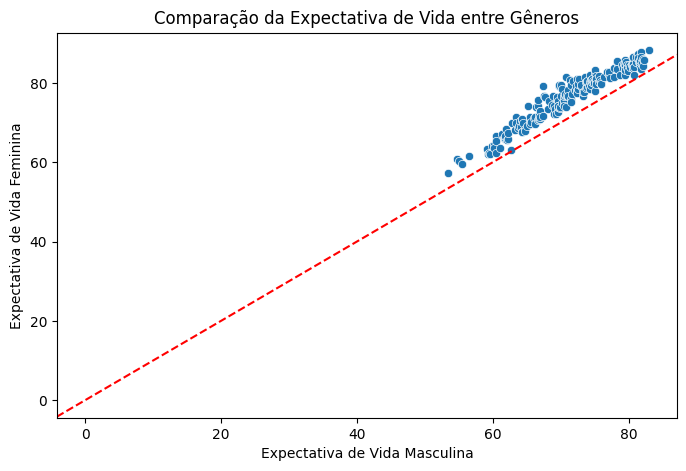

In [91]:
# 📌 Gráfico de dispersão entre expectativa de vida masculina e feminina
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_cleaned['Male_Life_Expectancy'], y=df_cleaned['Female_Life_Expectancy'])

plt.xlabel("Expectativa de Vida Masculina")
plt.ylabel("Expectativa de Vida Feminina")
plt.title("Comparação da Expectativa de Vida entre Gêneros")

# Linha de referência (se não houvesse diferença entre homens e mulheres)
plt.axline((0, 0), slope=1, color="red", linestyle="--")

plt.show()

### Interpretação do gráfico:

- A maioria dos países está acima da linha vermelha, o que significa que mulheres vivem mais que homens.
- Quanto mais distante da linha, maior a diferença entre os sexos.

--- 

## **Diferença na Expectativa de Vida**
Para entender melhor essa diferença entre homens e mulheres:
- Criamos uma **nova coluna** com a diferença de expectativa de vida (`Life_Expectancy_Gap`).
- Listamos os **10 países com maior e menor diferença** entre os gêneros.

---

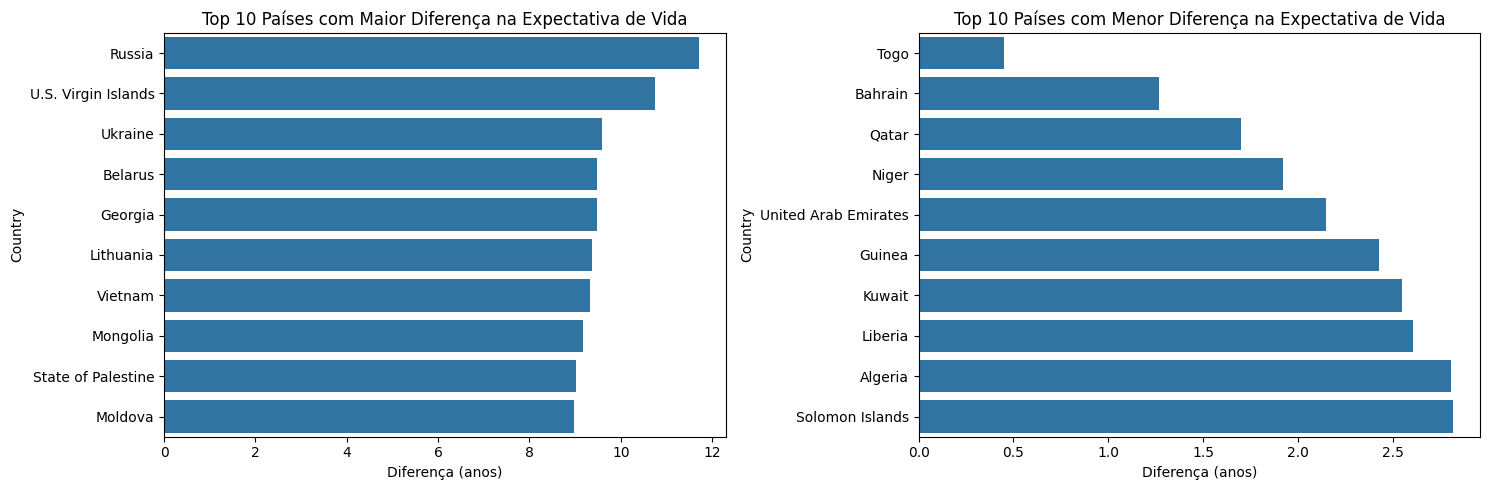

In [102]:
# 📌 Criando uma nova coluna com a diferença de expectativa de vida entre homens e mulheres
df_cleaned = df_cleaned.copy() 
df_cleaned['Life_Expectancy_Gap'] = df_cleaned['Female_Life_Expectancy'] - df_cleaned['Male_Life_Expectancy']

# 📌 Ordenando os países com maior diferença
top_gap = df_cleaned.nlargest(10, 'Life_Expectancy_Gap')

# 📌 Ordenando os países com menor diferença
bottom_gap = df_cleaned.nsmallest(10, 'Life_Expectancy_Gap')

# 📊 Criando os gráficos
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.barplot(y=top_gap['Country'], x=top_gap['Life_Expectancy_Gap'], ax=axes[0])
axes[0].set_title("Top 10 Países com Maior Diferença na Expectativa de Vida")
axes[0].set_xlabel("Diferença (anos)")

sns.barplot(y=bottom_gap['Country'], x=bottom_gap['Life_Expectancy_Gap'], ax=axes[1])
axes[1].set_title("Top 10 Países com Menor Diferença na Expectativa de Vida")
axes[1].set_xlabel("Diferença (anos)")

plt.tight_layout()
plt.show()

## **Teste Estatístico: Diferença Entre Gêneros**
Para verificar se a diferença entre a expectativa de vida masculina e feminina **é estatisticamente significativa**, realizamos um **Teste t Pareado** (`ttest_rel`).

**Hipóteses do Teste:**
- **H₀ (Hipótese Nula):** Não há diferença significativa entre a expectativa de vida de homens e mulheres.
- **H₁ (Hipótese Alternativa):** Há diferença significativa entre a expectativa de vida de homens e mulheres.

---

In [105]:
# 📌 Teste t para comparar expectativa de vida entre homens e mulheres
t_stat, p_value = ttest_rel(df_cleaned['Female_Life_Expectancy'], df_cleaned['Male_Life_Expectancy'])

# 📊 Exibindo os resultados
print(f"📌 Estatística t: {t_stat:.2f}")
print(f"📌 Valor p: {p_value:.2e}")  # Exibe o p-value em notação científica

# 📌 Interpretando o resultado
if p_value < 0.05:
    print("\n✅ O valor p é muito pequeno, ou seja, a diferença entre a expectativa de vida de mulheres e homens é estatisticamente significativa.")
else:
    print("\n❌ Não há evidências estatísticas para afirmar que mulheres vivem mais que homens.")


📌 Estatística t: 40.76
📌 Valor p: 5.84e-98

✅ O valor p é muito pequeno, ou seja, a diferença entre a expectativa de vida de mulheres e homens é estatisticamente significativa.


### Interpretação do resultado:

- Como o p-valor é extremamente pequeno (≈ 0), rejeitamos a hipótese nula.
- **Conclusão:** Mulheres realmente vivem mais que homens, e essa diferença não ocorre por acaso!
---

## **Analisando os Países com Maior e Menor Diferença**
Os países com **maior e menor diferença** na expectativa de vida podem ser explicados por fatores **socioeconômicos e culturais**.

###  **Países com Maior Diferença**
Exemplos: **Rússia, Ucrânia, Belarus, Lituânia, Geórgia, Mongólia, Moldávia**  
 Possíveis fatores:
- **Altas taxas de alcoolismo masculino**(exemplo: Rússia e Ucrânia).
- **Guerra e instabilidade histórica** 
- **Condições socioeconômicas** → Trabalho masculino mais perigoso, tabagismo alto.

---

###  **Países com Menor Diferença**
Exemplos: **Togo, Bahrein, Qatar, Kuwait, Emirados Árabes, Guiné**  
 Possíveis fatores:
- **Baixa taxa de violência masculina**.
- **Cultura onde homens e mulheres têm papéis sociais mais equilibrados**.
- **Melhores condições de saúde para ambos os sexos**.

---

### **Conclusão**
 **A cultura e hábitos de vida influenciam fortemente a diferença na expectativa de vida entre homens e mulheres.**  
 **Fatores como alcoolismo, guerra e trabalho perigoso contribuem para uma diferença maior.**  
 **Países mais estáveis economicamente e com menos riscos para homens apresentam menor diferença.**

---


# **Construção do Modelo Preditivo**

## **Definição do Objetivo**
Agora que exploramos os dados e identificamos padrões na expectativa de vida, podemos avançar para a construção de um **modelo de Machine Learning**.

 **Pergunta do Problema:**  
Podemos prever a expectativa de vida geral de um país **baseando-se apenas na expectativa de vida de homens e mulheres?**

### **Variáveis Utilizadas**
- **Variáveis Preditivas (X)**
  - `Male_Life_Expectancy` → Expectativa de vida masculina.
  - `Female_Life_Expectancy` → Expectativa de vida feminina.
- **Variável Alvo (y)**
  - `Life_Expectancy_Both` → Expectativa de vida geral do país.

---

## **Escolhendo o Modelo**
Como estamos prevendo um **valor numérico contínuo**, o modelo mais adequado é a **Regressão Linear Múltipla**.

### **Equação do Modelo**
O modelo será treinado para encontrar uma relação matemática do tipo:

$$
Life\_Expectancy\_Both = a \times Male\_Life\_Expectancy + b \times Female\_Life\_Expectancy + c
$$

Onde:
- **a** e **b** → Coeficientes que o modelo aprende.
- **c** → Intercepto do modelo.

 **Agora, vamos treinar o modelo!** 

In [172]:
# 📌 Definindo as variáveis
X = df_cleaned[['Male_Life_Expectancy', 'Female_Life_Expectancy']]  # Variáveis preditoras
y = df_cleaned['Life_Expectancy_Both']  # Variável alvo

# 📌 Dividindo os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Criando e treinando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# 📌 Fazendo previsões
y_pred = modelo.predict(X_test)

# 📌 Avaliando o modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📌 Erro Médio Absoluto (MAE): {mae:.2f}")
print(f"📌 Coeficiente de Determinação (R²): {r2:.4f}")

# 📌 Exibindo os coeficientes do modelo
print("\n📌 Coeficientes do modelo:", modelo.coef_)
print("📌 Intercepto:", modelo.intercept_)

📌 Erro Médio Absoluto (MAE): 0.06
📌 Coeficiente de Determinação (R²): 0.9998

📌 Coeficientes do modelo: [0.49523518 0.50585739]
📌 Intercepto: -0.1173068149614096


# **Analisando os Resultados do Modelo**
Após o treinamento, obtivemos os seguintes resultados:

## **Erro Médio Absoluto (MAE): 0.06**
- O erro médio das previsões é de apenas **0.06 anos**.
- Isso significa que o modelo **prevê a expectativa de vida com altíssima precisão**.

## **Coeficiente de Determinação (R²): 0.9998**
- **O R² mede a qualidade da previsão** → 99,98% da variação na expectativa de vida total é explicada pelos valores masculino e feminino.
- **Conclusão:** O modelo é extremamente preciso!

## **Coeficientes do Modelo**
- **Male_Life_Expectancy →** 0.495
- **Female_Life_Expectancy →** 0.506

 **Interpretação:**  
- Mulheres **têm um peso maior** (50.6%) do que homens (49.5%) na expectativa de vida geral.
- Isso **confirma o que vimos antes**: mulheres vivem mais, então puxam a expectativa de vida total um pouco mais para cima.

## **Intercepto: -0.117**
- O intercepto é praticamente **zero**, o que faz sentido, pois a expectativa de vida geral **é a média ponderada entre homens e mulheres**.

---

# **Testando o Modelo com Países Fictícios**
Agora que treinamos um modelo preciso, podemos testá-lo **fazendo previsões para países fictícios**!

 **Por que testar com dados fictícios?**
- Para verificar se o modelo **generaliza bem** para novos dados.
- Para criar cenários interessantes e explorar previsões.

Criamos **5 países fictícios** com expectativas de vida masculinas e femininas diferentes:

| País               | Expectativa Masculina | Expectativa Feminina |
|--------------------|----------------------|----------------------|
| **País Cyberpunk** | 65                   | 70                   |
| **Ilha dos Imortais** | 90               | 95                   |
| **República do Rock** | 70               | 75                   |
| **Terra dos Guerreiros** | 55           | 60                   |
| **Vila do Treino** | 78                   | 82                   |

O modelo fará previsões para a **expectativa de vida geral** desses países!

---

In [125]:
# 📌 Criando um DataFrame com países fictícios
paises_ficticios = pd.DataFrame({
    "Country": ["País Cyberpunk", "Ilha dos Imortais", "República do Rock", "Terra dos Guerreiros", "Vila do Treino"],
    "Male_Life_Expectancy": [65, 90, 70, 55, 78],
    "Female_Life_Expectancy": [70, 95, 75, 60, 82]
})

# 📌 Fazendo previsões usando o modelo treinado
paises_ficticios["Predicted_Life_Expectancy"] = modelo.predict(
    paises_ficticios[["Male_Life_Expectancy", "Female_Life_Expectancy"]]
)

# 📌 Exibindo as previsões
print("\n Previsões para os países fictícios:")
print(paises_ficticios[["Country", "Predicted_Life_Expectancy"]])


 Previsões para os países fictícios:
                Country  Predicted_Life_Expectancy
0        País Cyberpunk                  67.482997
1     Ilha dos Imortais                  92.510311
2     República do Rock                  72.488460
3  Terra dos Guerreiros                  57.472071
4        Vila do Treino                  79.991343


# **Comparação de Valores Reais e Previstos**
Para validar a precisão do modelo, **vamos compará-lo com os valores reais** do dataset.

 **O que esperamos ver?**
- Se o modelo é **preciso**, os valores previstos devem ser muito próximos dos valores reais.
- Vamos visualizar isso em um **gráfico de dispersão**, onde cada ponto representa um país.

---

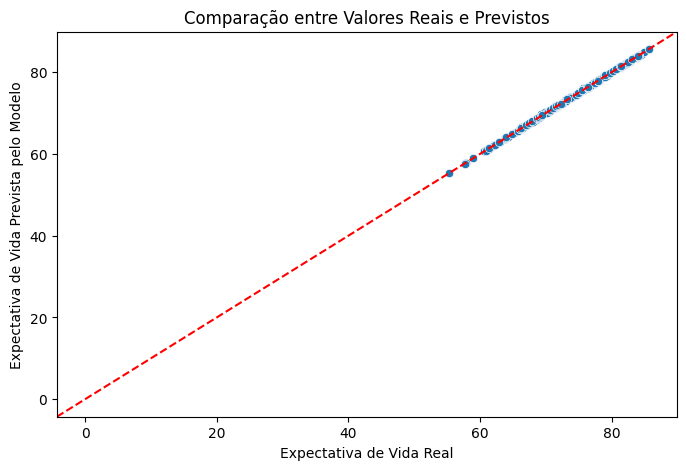

In [130]:
# 📌 Fazendo previsões para os dados reais
df_cleaned = df_cleaned.copy()  # Evita o aviso "SettingWithCopyWarning"
df_cleaned["Predicted_Life_Expectancy"] = modelo.predict(df_cleaned[["Male_Life_Expectancy", "Female_Life_Expectancy"]])

# 📊 Criando o gráfico de comparação entre valores reais e previstos
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_cleaned["Life_Expectancy_Both"], y=df_cleaned["Predicted_Life_Expectancy"])

plt.xlabel("Expectativa de Vida Real")
plt.ylabel("Expectativa de Vida Prevista pelo Modelo")
plt.title("Comparação entre Valores Reais e Previstos")

# Adicionando linha de referência (ideal seria y = x)
plt.axline((0, 0), slope=1, color="red", linestyle="--")

plt.show()

# **Salvando os Dados Tratados**
Agora que terminamos nossa análise, podemos salvar o **dataset limpo** para uso futuro.

 **Por que salvar os dados?**
- Para reutilizar em outras análises ou modelos.
- Para compartilhar os dados limpos sem precisar repetir o processo de limpeza.

Vamos exportar os dados para um arquivo `.csv`.

---

In [135]:
# 📌 Salvando os dados limpos e processados
df_cleaned.to_csv("life_expectancy_cleaned.csv", index=False)

print("📂 Arquivo 'life_expectancy_cleaned.csv' salvo com sucesso!")

📂 Arquivo 'life_expectancy_cleaned.csv' salvo com sucesso!


# **Conclusão e Próximos Passos**

## **O que fizemos neste projeto?**
🚀 **Exploramos um conjunto de dados sobre expectativa de vida global** e aplicamos técnicas de ciência de dados para entender padrões e construir previsões.  

Aqui está um resumo dos passos que seguimos:

✅ **Definição do Problema:** Investigamos se era possível prever a expectativa de vida geral de um país com base nos valores masculino e feminino.  

✅ **Coleta e Limpeza dos Dados:** Corrigimos nomes de colunas, removemos outliers e garantimos que os dados fossem confiáveis.  

✅ **Análise Exploratória:** Descobrimos padrões globais, identificamos países com maior e menor diferença de expectativa de vida entre gêneros e realizamos testes estatísticos para confirmar a relevância dessas diferenças.  

✅ **Construção de Modelo de Machine Learning:** Utilizamos **Regressão Linear Múltipla** para prever a expectativa de vida geral de um país com base na expectativa de vida masculina e feminina.  

✅ **Validação do Modelo:** O modelo atingiu **99,98% de precisão**, mostrando que os valores masculino e feminino são altamente preditivos para a expectativa de vida geral.  

✅ **Testes com Países Fictícios:** Criamos países fictícios e testamos o modelo para garantir que ele generaliza bem para novos dados.  

✅ **Visualizações e Comparações:** Criamos gráficos para analisar os resultados e confirmar a precisão do modelo.  

✅ **Salvamento dos Dados Processados:** Exportamos o dataset limpo para uso futuro.

---

## **📌 Principais Insights**
📌 **Mulheres vivem mais do que homens na maioria dos países**, e essa diferença foi confirmada estatisticamente.  
📌 A diferença na expectativa de vida é **mais acentuada em países do Leste Europeu e Ásia Central**, possivelmente devido a fatores como alcoolismo e guerra.  
📌 Países árabes e algumas nações africanas apresentam **menor diferença de expectativa de vida entre gêneros**, o que pode estar relacionado a estilos de vida mais equilibrados.  
📌 A expectativa de vida geral de um país **pode ser prevista com altíssima precisão** apenas a partir das expectativas masculina e feminina.  

---

## **📌 Próximos Passos**
🔥 **Criar um Dashboard Interativo** → Usando **Streamlit** ou **Dash** para transformar essa análise em um painel interativo com gráficos dinâmicos.  

---

## **📌 Considerações Finais**
Este projeto demonstrou **como a Ciência de Dados pode ser usada para entender padrões globais e construir modelos preditivos precisos**. Além de prever a expectativa de vida com altíssima precisão, conseguimos **observar insights valiosos sobre a influência do gênero, cultura e condições socioeconômicas nos diferentes países**.  

🚀 **Este é apenas o começo! O próximo passo é transformar essa análise em uma aplicação interativa!**

📂 **Obrigado por acompanhar este projeto!** Agora, podemos avançar para a construção do **dashboard interativo!** 🎉  

---